# 指数策略

指数增强策略是指基金经理在构建投资组合时，运用“指数跟踪”与“主动管理”相结合的方式获取超额收益的投资策略，而相对于单纯的“指数”，指数增强策略的关键点是管理人的“主动管理”能力。简单而言，就是让产品走势与指数保持一致的同时，获得更高的收益率。

本策略选取沪深300权重高于0.25的股票，初始权重为筛选以后的各个股票的初始权重，之后根据股票的涨跌情况来判断增加比重还是减少比重。简化策略为：如果股票连续五天上涨则比重提高25%，如果股票连续下降五天则比重降低25%,时间区间为2010-01-01到2019-12-31，数据来源为tushare。

### 导入相关库

In [1]:
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

###  获取沪深300的数据、沪深300的成分股的比重和各个成分股的时期股价

In [2]:
hs300 = ts.get_k_data(code='399300',start='2010-01-01',end ='2019-12-31' )

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


hs300中有沪深300的开盘价、收盘价、最高价、最低价、总量等数据，后面研究主要以收盘价作为标准

可以看到hs300的历史数据：

In [3]:
hs300

,date,open,close,high,low,volume,code
0,2010-01-04,3592.468,3536.221,3597.75,3535.38,66101080.0,399300
1,2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,399300
2,2010-01-06,3558.700,3542.209,3588.83,3541.17,78473125.0,399300
3,2010-01-07,3543.160,3472.313,3558.56,3452.77,80350037.0,399300
4,2010-01-08,3456.908,3480.403,3482.08,3426.70,60613533.0,399300
...,...,...,...,...,...,...,...
2425,2019-12-25,3988.660,3990.870,4000.56,3976.36,94938890.0,399300
2426,2019-12-26,3993.670,4025.990,4025.99,3993.54,108860640.0,399300
2427,2019-12-27,4029.250,4022.030,4066.80,4019.72,150926411.0,399300
2428,2019-12-30,4015.520,4081.630,4083.69,4001.50,155971488.0,399300


hs300_weight保存沪深300的成分股的比重和股票代码：

In [4]:
hs300_weight = pd.DataFrame(ts.get_hs300s())
hs300_weight

,date,code,name,weight
0,2020-10-30,600000,浦发银行,0.65
1,2020-10-30,600004,白云机场,0.08
2,2020-10-30,600009,上海机场,0.38
3,2020-10-30,600010,包钢股份,0.16
4,2020-10-30,600011,华能国际,0.13
...,...,...,...,...
295,2020-10-30,300413,芒果超媒,0.32
296,2020-10-30,300433,蓝思科技,0.26
297,2020-10-30,300498,温氏股份,0.51
298,2020-10-30,300601,康泰生物,0.36


对hs300成分股关于权重进行排序

In [5]:
hs300_weight_sort = hs300_weight.sort_values(["weight"],ascending = False)
hs300_weight_sort

,date,code,name,weight
127,2020-10-30,601318,中国平安,5.04
62,2020-10-30,600519,贵州茅台,5.01
219,2020-10-30,000858,五 粮 液,2.83
15,2020-10-30,600036,招商银行,2.45
197,2020-10-30,000333,美的集团,2.28
...,...,...,...,...
104,2020-10-30,601077,渝农商行,0.03
118,2020-10-30,601212,白银有色,0.02
42,2020-10-30,600299,安迪苏,0.02
126,2020-10-30,601298,青岛港,0.02


对成分股的股票的权重进行排序，可以得到图形：

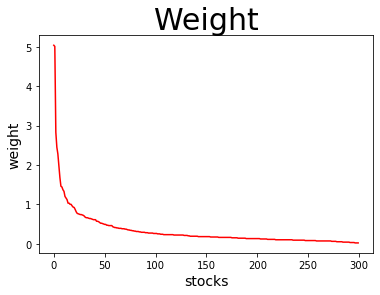

In [6]:
plt.title('Weight',fontsize=30) #标题
plt.xlabel('stocks',fontsize=14)  #xlabel
plt.ylabel('weight',fontsize=14) #ylabel
plt.plot(range(len(hs300_weight_sort)),hs300_weight_sort['weight'],'r-')

对于权重大于0.25的股票进行筛选：

In [7]:
pct25= hs300_weight_sort.loc[hs300_weight_sort['weight']>=0.25] 
pct25

,date,code,name,weight
127,2020-10-30,601318,中国平安,5.04
62,2020-10-30,600519,贵州茅台,5.01
219,2020-10-30,000858,五 粮 液,2.83
15,2020-10-30,600036,招商银行,2.45
197,2020-10-30,000333,美的集团,2.28
...,...,...,...,...
64,2020-10-30,600547,山东黄金,0.26
235,2020-10-30,002050,三花智控,0.26
237,2020-10-30,002129,中环股份,0.25
168,2020-10-30,601939,建设银行,0.25


对于权重大于0.25的进行画图可以得到：

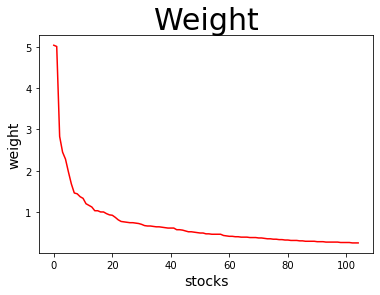

In [8]:
plt.title('Weight',fontsize=30) #标题
plt.xlabel('stocks',fontsize=14)  #xlabel
plt.ylabel('weight',fontsize=14) #ylabel
plt.plot(range(len(pct25)),pct25['weight'],'r-')

可以看到hs300的全部成分股 与 比重大于0.25的成分股 的大体图像接近。
后者有100多个股票，权重较大的股票对于指数的影响较大。

保存比重大于0.25的股票的代码

In [9]:
codes = [x for x in pct25['code']]  #代码目录
codes  #codes中每个元素是str类

['601318',
 '600519',
 '000858',
 '600036',
 '000333',
 '600276',
 '000651',
 '600030',
 '600887',
 '002475',
 '601166',
 '601012',
 '601888',
 '000002',
 '000001',
 '601398',
 '002415',
 '600900',
 '300059',
 '603288',
 '600031',
 '002594',
 '600837',
 '000725',
 '000568',
 '300015',
 '600309',
 '601328',
 '600585',
 '601688',
 '603259',
 '600016',
 '600048',
 '002352',
 '600000',
 '601668',
 '002714',
 '000661',
 '002241',
 '002142',
 '002304',
 '300122',
 '601899',
 '002027',
 '600690',
 '601288',
 '000063',
 '601601',
 '300498',
 '601211',
 '600104',
 '000100',
 '601229',
 '600438',
 '600999',
 '300142',
 '600570',
 '601628',
 '000338',
 '600588',
 '601169',
 '600436',
 '601988',
 '300124',
 '600196',
 '601766',
 '300347',
 '603986',
 '002410',
 '600009',
 '002271',
 '601818',
 '300601',
 '002230',
 '600809',
 '000876',
 '002007',
 '600919',
 '601088',
 '601336',
 '300413',
 '000538',
 '600660',
 '600028',
 '600703',
 '000895',
 '600741',
 '300014',
 '600406',
 '002311',
 '002460',

遍历所有的股票代码，并且建立dataframe，一共105个股票，从2010-01-01到2019-12-31

In [12]:
prices = []
for cd in codes:
    data = ts.get_k_data(code=cd,start='2010-01-01',end ='2019-12-31' )
    tmp1 = [x for x in data['close']]
    prices.append(tmp1)
prices
prices_df = pd.DataFrame(prices)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/docu

In [13]:
prices_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427
0,23.456,23.752,23.248,22.817,22.682,22.795,23.008,21.903,22.190,22.233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,108.446,108.127,106.417,104.477,103.379,102.926,105.708,103.022,107.552,108.401,...,1149.3,1148.0,1133.7,1135.1,1163.0,1185.8,1183.0,NaN,NaN,NaN
2,26.113,26.387,25.689,24.909,24.859,24.627,25.332,25.133,26.104,26.204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.854,11.868,11.620,11.319,11.319,11.339,11.426,10.810,10.931,10.917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.608,10.509,10.147,10.247,9.781,9.781,9.835,10.233,10.163,10.397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 数据清理
可以看到上表中有很多NaN缺失值，这里采用横向填补，也就是假设单只股票的股票价格如果缺失，则其股票价格与前一天一样，

因为输出到excel中可以看到大部分NaN主要集中在2019年年末，也就是只会在尾部的时候该策略的股价趋于平稳，总体的趋势还是有的

In [14]:
prices_df = prices_df.fillna(method='ffill',axis='columns') #填补缺失值，横向填补，也就是今天的收盘价如果为nan则与昨天相同
prices_df

,0,1,2,3,4,5,6,7,8,9,...,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427
0,23.456,23.752,23.248,22.817,22.682,22.795,23.008,21.903,22.190,22.233,...,85.46,85.46,85.46,85.46,85.46,85.46,85.46,85.46,85.46,85.46
1,108.446,108.127,106.417,104.477,103.379,102.926,105.708,103.022,107.552,108.401,...,1149.30,1148.00,1133.70,1135.10,1163.00,1185.80,1183.00,1183.00,1183.00,1183.00
2,26.113,26.387,25.689,24.909,24.859,24.627,25.332,25.133,26.104,26.204,...,133.01,133.01,133.01,133.01,133.01,133.01,133.01,133.01,133.01,133.01
3,11.854,11.868,11.620,11.319,11.319,11.339,11.426,10.810,10.931,10.917,...,37.58,37.58,37.58,37.58,37.58,37.58,37.58,37.58,37.58,37.58
4,9.608,10.509,10.147,10.247,9.781,9.781,9.835,10.233,10.163,10.397,...,58.25,58.25,58.25,58.25,58.25,58.25,58.25,58.25,58.25,58.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,38.305,39.118,38.421,37.826,37.575,38.387,38.276,37.280,37.173,37.250,...,32.62,32.62,32.62,32.62,32.62,32.62,32.62,32.62,32.62,32.62
101,3.825,3.784,3.744,3.671,3.696,3.664,3.816,3.865,3.975,3.935,...,17.33,17.33,17.33,17.33,17.33,17.33,17.33,17.33,17.33,17.33
102,2.733,2.772,2.739,2.733,2.706,2.973,2.997,3.051,3.150,3.168,...,11.81,11.81,11.81,11.81,11.81,11.81,11.81,11.81,11.81,11.81
103,3.788,3.844,3.782,3.726,3.739,3.801,3.819,3.627,3.646,3.640,...,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23,7.23


isascend是连续上升五天的，isdecend是连续下降五天的判断函数。

In [15]:
def isascend(a,b,c,d,e):
    #连续上升五天
    return e>d and d>c and c>b and b>a

def isdecend(a,b,c,d,e):
    #连续下降五天
    return e<d and d<c and c<b and b<a

total_weight保存的是初始的沪深300比重大于0.25的股票的初始权重

In [16]:
total_weight=[x for x in pct25['weight']]  #float类型
#初始weight
total_weight

[5.04,
 5.01,
 2.83,
 2.45,
 2.28,
 1.97,
 1.68,
 1.46,
 1.44,
 1.37,
 1.33,
 1.2,
 1.16,
 1.12,
 1.03,
 1.03,
 1.0,
 1.0,
 0.96,
 0.93,
 0.92,
 0.87,
 0.81,
 0.77,
 0.76,
 0.75,
 0.74,
 0.74,
 0.73,
 0.72,
 0.7,
 0.67,
 0.66,
 0.66,
 0.65,
 0.64,
 0.64,
 0.63,
 0.62,
 0.61,
 0.61,
 0.61,
 0.57,
 0.57,
 0.56,
 0.54,
 0.52,
 0.52,
 0.51,
 0.5,
 0.49,
 0.49,
 0.47,
 0.47,
 0.46,
 0.46,
 0.46,
 0.46,
 0.43,
 0.42,
 0.41,
 0.41,
 0.4,
 0.4,
 0.39,
 0.39,
 0.39,
 0.38,
 0.38,
 0.38,
 0.37,
 0.37,
 0.36,
 0.35,
 0.35,
 0.34,
 0.34,
 0.33,
 0.33,
 0.32,
 0.32,
 0.31,
 0.31,
 0.31,
 0.3,
 0.3,
 0.29,
 0.29,
 0.29,
 0.29,
 0.28,
 0.28,
 0.28,
 0.27,
 0.27,
 0.27,
 0.27,
 0.27,
 0.26,
 0.26,
 0.26,
 0.26,
 0.25,
 0.25,
 0.25]

re_weight是将权重归一化，也就是按照其权重进行加权平均，权重归一化后总和为1

In [17]:
def re_weight(w):
    sum = 0.0
    for i in w:
        sum += i
    for i in range(len(w)):
        w[i]/=sum
re_weight(total_weight)
#total_weight
#重新按照加权平均 权重  归一化

这里做简化处理：对于最开始的五天，不做处理，直接按照初始比重进行确定

In [18]:
#最开始的5天的股价，不需要判断是否连续五天增加或者减少，直接根据初始权重进行计算
result = []
for i in range(5):
    res = 0
    for j in range(len(total_weight)):
        res += total_weight[j] * prices_df.iloc[j,i]
    result.append(res)
result

[18.22608457645178,
 18.455496670218423,
 18.29981965903038,
 18.079249067661156,
 18.022004262120397]

对于连续上升五天的股票，其权重上升25%，对于连续下降的股票其权重下降25%。
权重变化以后，重新将新的权重加权平均。

In [19]:
for i in range(5,len(prices_df.iloc[0,0:])):
    res = 0
    #re_weight
    for j in range(len(total_weight)):  #0~74
        #判断是否连续上升五天
        if isascend(prices_df.iloc[j,i-4],prices_df.iloc[j,i-3],prices_df.iloc[j,i-2],prices_df.iloc[j,i-1],prices_df.iloc[j,i]):
            total_weight[j]*=1.25
        #判断是否连续下降五天
        if isdecend(prices_df.iloc[j,i-4],prices_df.iloc[j,i-3],prices_df.iloc[j,i-2],prices_df.iloc[j,i-1],prices_df.iloc[j,i]):
            total_weight[j]/=1.25
        #重新加权平均
    re_weight(total_weight)
    
    #根据计算以后的权重和当日股价进行计算股价，并且将该策略得到的股票价格保存在result这个list中
    for j in range(len(total_weight)):
        res += prices_df.iloc[j,i] * total_weight[j]
    
    result.append(res)

result

[18.22608457645178,
 18.455496670218423,
 18.29981965903038,
 18.079249067661156,
 18.022004262120397,
 16.937297829508687,
 17.396854487254686,
 17.20080024400168,
 17.73881500483956,
 18.22257976971795,
 18.915726078686706,
 19.78999911450033,
 20.68751305358061,
 22.373536229435626,
 24.695187965742186,
 28.116269238134265,
 27.879745398254077,
 29.431671865405686,
 30.953107761173868,
 31.012562335491616,
 32.806551083264914,
 35.330169151476426,
 37.85173155147084,
 40.64316518867157,
 38.24923456503467,
 37.675798364722,
 37.75488514674037,
 38.144237161734345,
 35.97250358209308,
 35.5100296925004,
 35.88903733947414,
 35.485269453194796,
 34.27427104033542,
 34.66526065113378,
 33.24525447004826,
 32.02781957302075,
 31.215917167770844,
 31.66173868512752,
 31.136811074767106,
 29.83647129014435,
 29.181755089275654,
 27.123342378948106,
 27.312892529157295,
 27.416975703894057,
 28.029508350024003,
 28.044004986673315,
 28.069835973829484,
 27.882123974133133,
 27.242212630336

可以看到一共有2428个股价，这个连续变化的序列就是经过指数增强策略得到的资产组合的价格

In [20]:
len(result)

2428

result_shift是将result中的股价全部下滑一个序列，并且result_shift的第一个元素用第一天的股价填补，result的后面再填补一个最后一天的股价，这样填补数据的目的是为了计算收益率r的时候不出现NaN或者其他错误。
计算的公式为result/result_shift - 1

In [21]:
result_shift = []
result_shift.append(result[0])
for i in result:
    result_shift.append(i)
result_shift

[18.22608457645178,
 18.22608457645178,
 18.455496670218423,
 18.29981965903038,
 18.079249067661156,
 18.022004262120397,
 16.937297829508687,
 17.396854487254686,
 17.20080024400168,
 17.73881500483956,
 18.22257976971795,
 18.915726078686706,
 19.78999911450033,
 20.68751305358061,
 22.373536229435626,
 24.695187965742186,
 28.116269238134265,
 27.879745398254077,
 29.431671865405686,
 30.953107761173868,
 31.012562335491616,
 32.806551083264914,
 35.330169151476426,
 37.85173155147084,
 40.64316518867157,
 38.24923456503467,
 37.675798364722,
 37.75488514674037,
 38.144237161734345,
 35.97250358209308,
 35.5100296925004,
 35.88903733947414,
 35.485269453194796,
 34.27427104033542,
 34.66526065113378,
 33.24525447004826,
 32.02781957302075,
 31.215917167770844,
 31.66173868512752,
 31.136811074767106,
 29.83647129014435,
 29.181755089275654,
 27.123342378948106,
 27.312892529157295,
 27.416975703894057,
 28.029508350024003,
 28.044004986673315,
 28.069835973829484,
 27.8821239741331

In [22]:
result.append(result[-1])

In [23]:
#计算收益率
r = []
for i in range(len(result)):
    r.append(result[i]/result_shift[i]-1)
len(r)

2429

计算沪深300的收益率

In [24]:
hs300['r'] = hs300['close']/hs300['close'].shift(1) -1
hs300r = [x for x in hs300['r'][1:]]

画出沪深300的收益率（蓝色）和指数增强策略的收益率（红色）

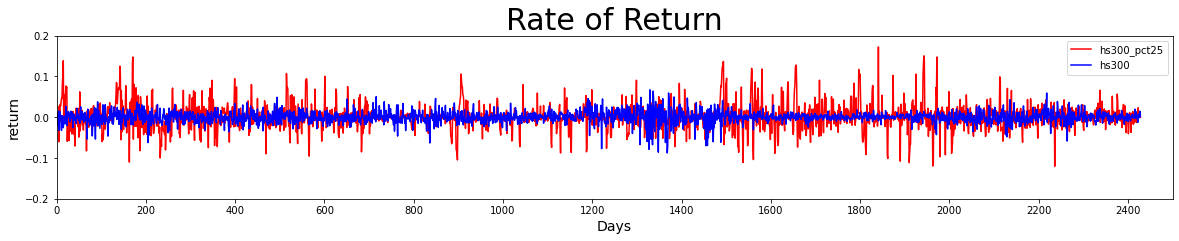

In [44]:
days = range(len(hs300r))
plt.figure(figsize=(20,3)) #图像大小
plt.title('Rate of Return',fontsize=30) #标题
plt.xlabel('Days',fontsize=14)  #xlabel
plt.ylabel('return',fontsize=14) #ylabel
x_major_locator=MultipleLocator(200)  #把x轴的刻度间隔设置为200，并存在变量里
y_major_locator=MultipleLocator(0.1)  #把y轴的刻度间隔设置为0.1，并存在变量里

ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator) #把x轴的主刻度设置为200的倍数
ax.yaxis.set_major_locator(y_major_locator) #把y轴的主刻度设置为0.1的倍数
plt.xlim(0,2500) #x轴的刻度范围
plt.ylim(-0.2,0.2) #y轴的刻度范围
plt.plot(days,r,'r-',label="hs300_pct25")
plt.plot(days,hs300r,'b-',label="hs300")

plt.legend(loc='best')
plt.show()

用minus保存 指数增强策略的收益率减去沪深300的收益率

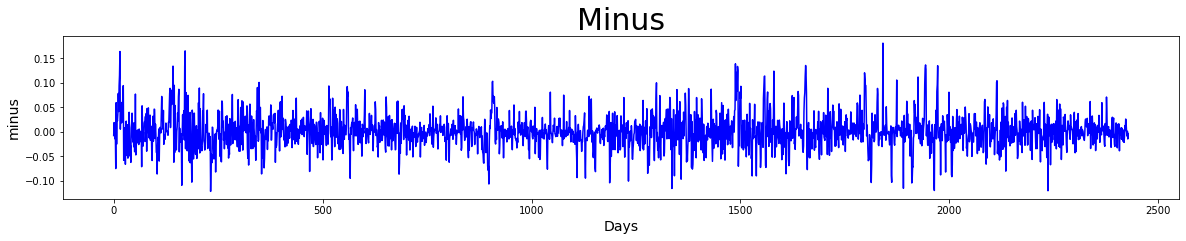

In [46]:
minus = []
for i in days:
    minus.append(r[i] - hs300r[i])
plt.figure(figsize=(20,3)) #图像大小
plt.title('Minus',fontsize=30) #标题
plt.xlabel('Days',fontsize=14)  #xlabel
plt.ylabel('minus',fontsize=14) #ylabel
plt.plot(days,minus,'b-')
plt.show()

计算总的时期，沪深300的涨幅 和 指数增强策略的增幅

In [47]:
hs300['close'][len(hs300['close'])-1]  /hs300['close'][0] -1

0.15846266395680586

In [48]:
result[-1] / result[0] -1

3.906154423851418

总的来说，根据图形来看，指数增强策略与沪深300的变动趋势大致相同，根据两者策略收益相减去以后的差额收益率变化也是比较剧烈，但是如果按照总的时期收益率来看的话，沪深300的收益率远远小于指数增强策略。总体而言，指数增强战略是达到了效果的，因为总体的收益比hs300更高，当然风险也更大，波动比较明显。